In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv('Advertising.csv')

In [6]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [24]:
l=['Unnamed: 0']
data.drop(l,axis=1,inplace=True)

In [25]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [28]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


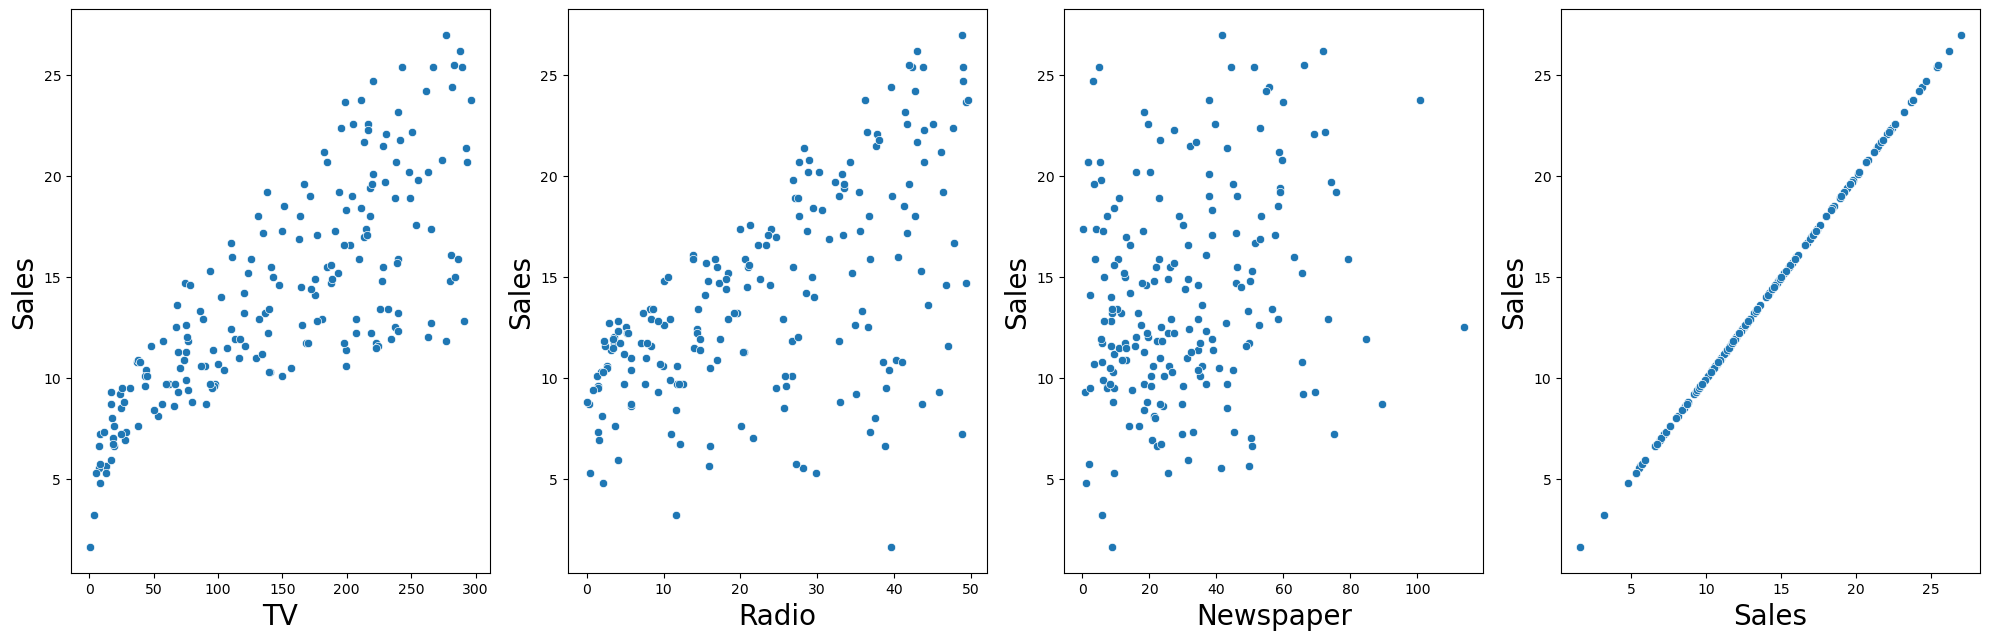

In [79]:
#scatterplot
plt.figure(figsize=(20, 25))
plotnumber = 1
for column in data.columns:
    plt.subplot(4, 4, plotnumber)
    sns.scatterplot(x=data[column], y=data['Sales'])
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Sales', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

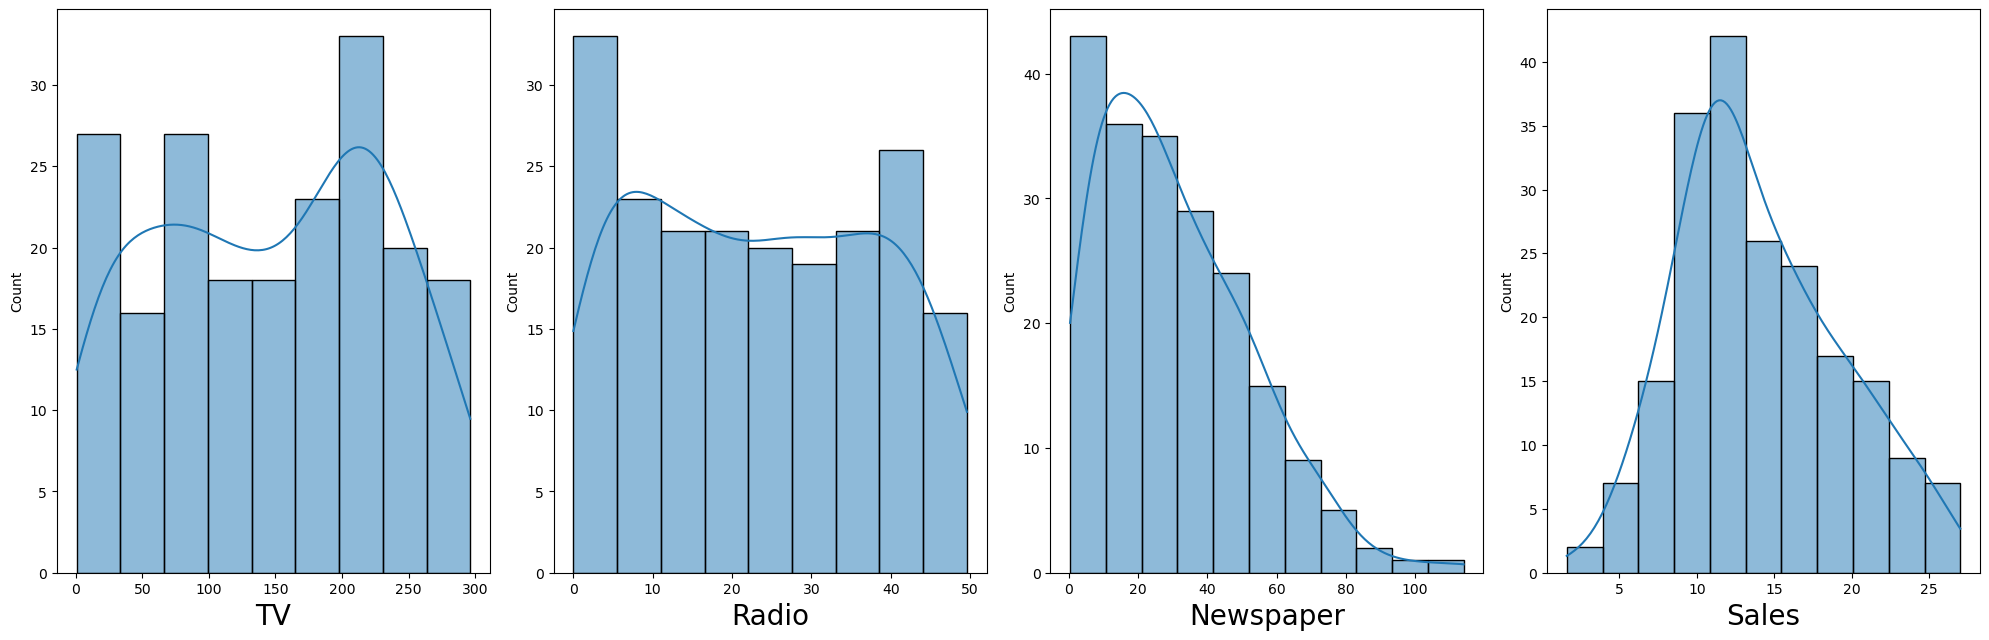

In [83]:
#histplot
plt.figure(figsize=(20, 25))
plotnumber = 1
for column in data.columns:
    plt.subplot(4, 4, plotnumber)
    sns.histplot(x=data[column],kde=True)
    plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

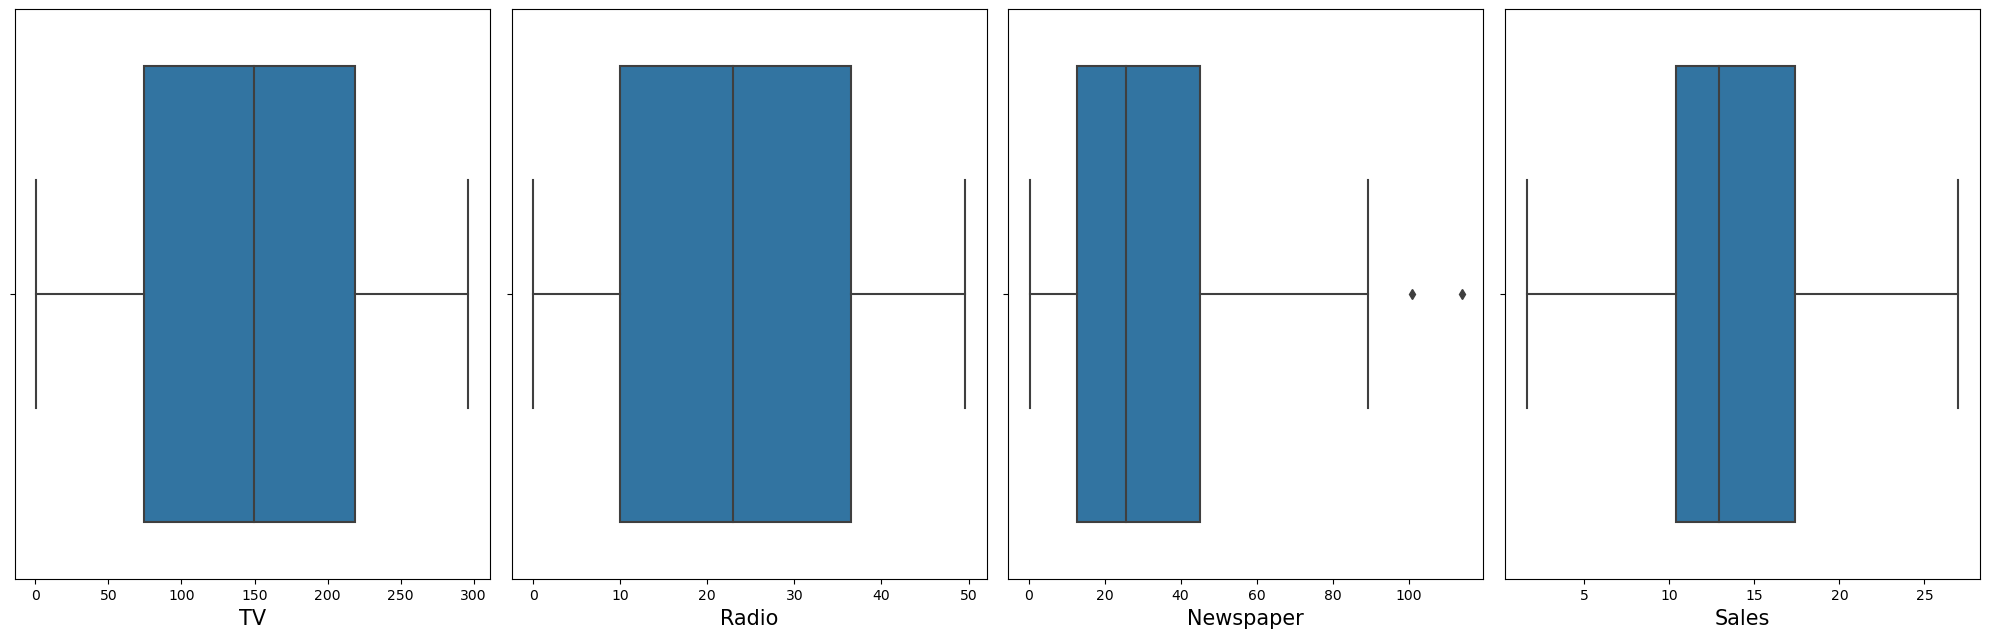

In [67]:
#boxplot
plt.figure(figsize=(20, 25))
plotnumber = 1
for column in data.columns:
    plt.subplot(4, 4, plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.tight_layout()

<Axes: >

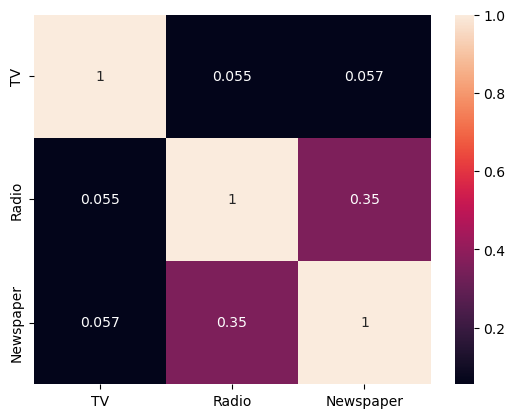

In [85]:
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

In [86]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [89]:
x=data.drop('Sales',axis=1)
y=data.Sales

In [90]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [91]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [93]:
x_train

,TV,Radio,Newspaper
26,142.9,29.3,12.6
134,36.9,38.6,65.6
180,156.6,2.6,8.3
158,11.7,36.9,45.2
189,18.7,12.1,23.4
...,...,...,...
104,238.2,34.3,5.3
129,59.6,12.0,43.1
183,287.6,43.0,71.8
174,222.4,3.4,13.1


In [94]:
y_train

26     15.0
134    10.8
180    10.5
158     7.3
189     6.7
       ... 
104    20.7
129     9.7
183    26.2
174    11.5
122    11.6
Name: Sales, Length: 160, dtype: float64

In [95]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [96]:
y_predict=LR.predict(x_test)

In [97]:
y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     11.2
177    11.7
88     12.9
187    17.3
61     24.2
199    13.4
191     9.9
123    15.2
184    17.6
188    15.9
33     17.4
171    14.5
138     9.6
84     21.7
81     12.3
102    14.8
147    25.4
34      9.5
47     23.2
124    19.7
112    14.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    12.2
45     14.9
153    19.0
119     6.6
100    11.7
83     13.6
181    12.2
71     12.4
Name: Sales, dtype: float64

In [98]:
y_predict

array([17.2752476 , 16.74844593, 21.97674588, 24.59448907, 12.11768831,
       21.02033688, 10.15643252, 12.34380805, 11.70461016, 17.02091374,
       22.77376935, 15.3468411 ,  8.47830473, 14.9155752 , 18.61592987,
       18.78535771, 18.92262443, 14.411111  ,  9.65948532, 20.60497137,
       14.91294261, 17.84682569, 23.05099966,  7.74477655, 21.55734502,
       19.45793001, 13.93893979, 11.55855542, 18.37843109, 12.19352005,
       11.35032808,  9.91369153, 13.57335272, 15.18177818, 18.06379607,
        6.80705318, 14.14598886, 14.14649594, 14.1536933 , 10.69806825])

In [100]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)


In [101]:
r2score

0.9085774752313167

In [102]:
x_test.shape

(40, 3)

In [104]:
adjusted_r2 = 1-(1-0.90)*(40-3)/(40-3-1)
adjusted_r2

0.8972222222222223

In [105]:
mean_squared_error=mean_squared_error(y_test,y_predict)
mean_squared_error

2.2171510725418955

In [106]:
mean_absolute_error=mean_absolute_error(y_test,y_predict)
mean_absolute_error

1.21148926064691